# **Scaling**

**StandardScaler**<br>
--> Rescales data to have mean = 0, std = 1 (Z-score scaling)<br>
--> Data with normal distribution or for algorithms needing zero mean<br>
**MinMaxScaler**	<br>
--> Scales data between 0 and 1<br>
--> When features have known min/max or neural networks<br>
 **MaxAbsScaler**	<br>
--> Scales features between -1 and 1 using max absolute value<br>
--> Sparse datasets, algorithms needing zero-centered data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# conver this data to pandas datafram
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [3]:
scalar = StandardScaler()
scalar_df = scalar.fit_transform(df)

scalar_df = pd.DataFrame(scalar_df,columns = df.columns)
scalar_df

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


In [4]:
scalar = MinMaxScaler()
scalar_df = scalar.fit_transform(df)

scalar_df = pd.DataFrame(scalar_df,columns = df.columns)
scalar_df

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


In [5]:
scalar = MaxAbsScaler()
scalar_df = scalar.fit_transform(df)

scalar_df = pd.DataFrame(scalar_df,columns = df.columns)
scalar_df

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# **Transformation**

In [6]:
import matplotlib.pyplot as plt

In [7]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

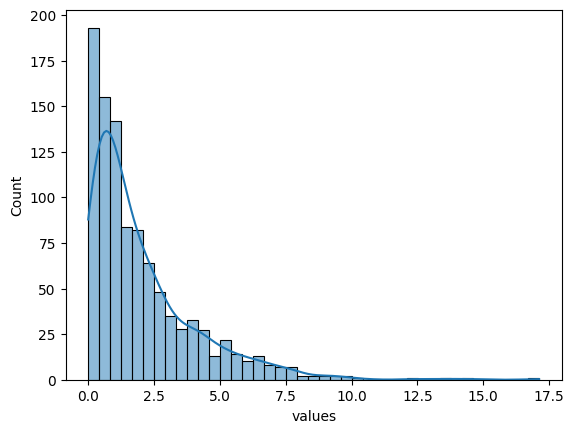

In [8]:
sns.histplot(df['values'],kde=True)

In [13]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# boxbcox k liay data must be postive
# +1 shifts the entire dataset to ensure all values become strictly positive
# Needed only if --> Your data has 0 or negative values
df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']]+1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])
df.head()

,values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


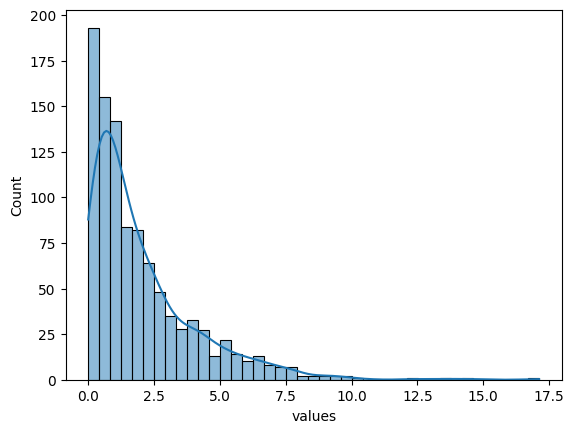

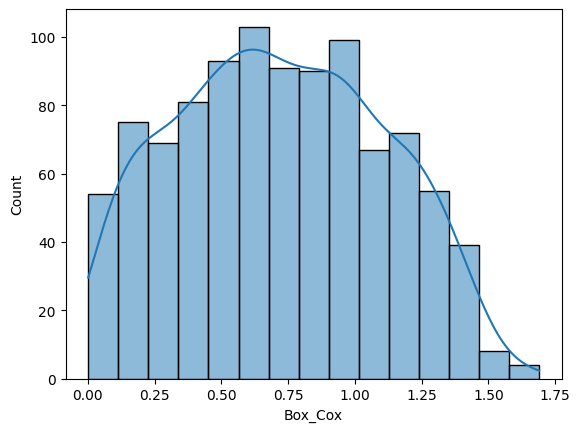

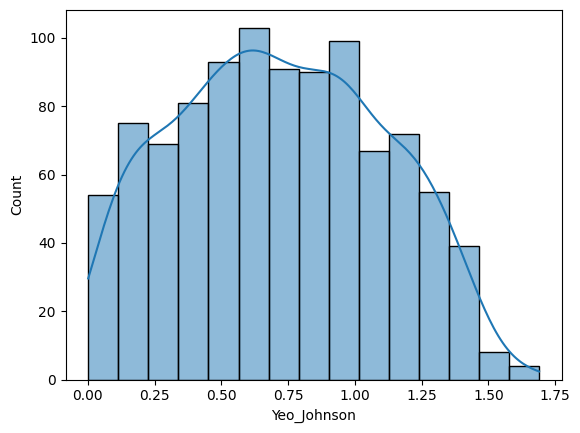

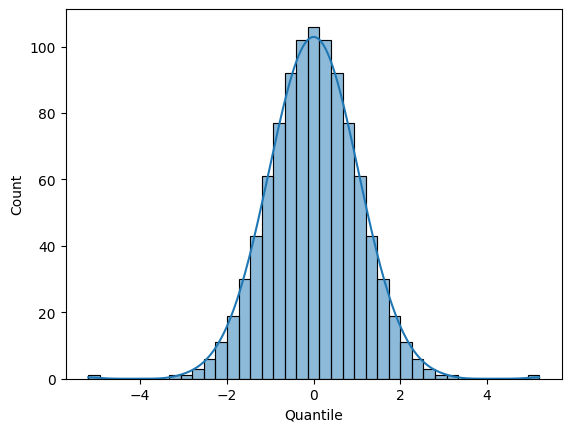

In [14]:
# creata hostograms for all columns using sns.hist and kde=true use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

## **Normalization**
Data Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

## **L1 Normalization:**
Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute values is 1 in each row. The L1 norm is calculated as the sum of the absolute vector values. Example:


In [ ]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

### **L2 Normalization:**
Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data. The L2 norm is calculated as the square root of the sum of the squared vector values.

In [15]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


## **Log Transformation**


In [16]:
import pandas as pd
import numpy as np

# example dataset with skewed values
df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000,1000000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


In [17]:
df['log_vals'] = np.log(df['Values'])
df

,Values,log_vals
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


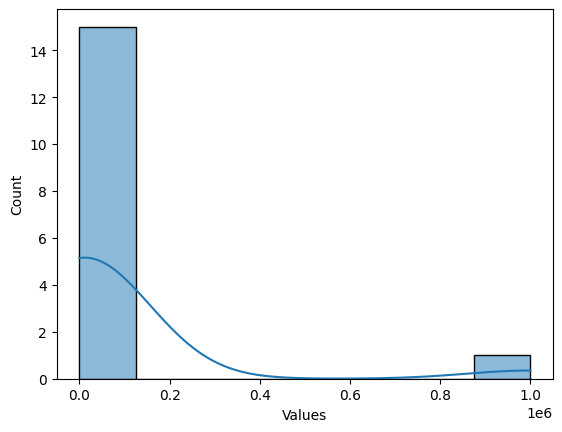

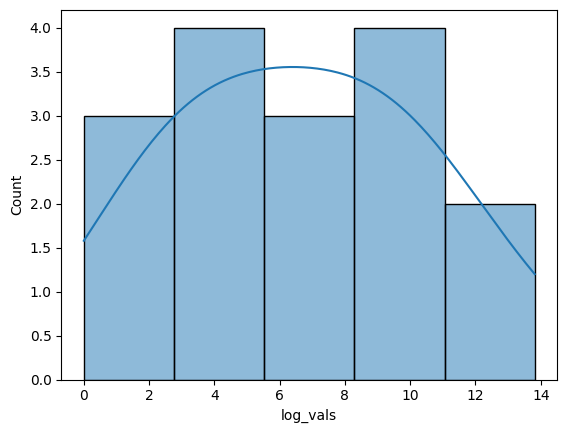

In [20]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()